In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
ss = pd.read_csv('Dataset/2016-07-metropolitan-stop-and-search.csv')
crime  = pd.read_csv('Dataset/2016-07-metropolitan-crimes.csv')

In [4]:
datetime = pd.DatetimeIndex(ss['Date'])

In [5]:
datetime

DatetimeIndex(['2016-06-30 23:02:00', '2016-06-30 23:05:00',
               '2016-06-30 23:05:00', '2016-06-30 23:10:00',
               '2016-06-30 23:10:00', '2016-06-30 23:12:00',
               '2016-06-30 23:20:00', '2016-06-30 23:23:00',
               '2016-06-30 23:30:00', '2016-06-30 23:34:00',
               ...
               '2016-07-31 22:05:00', '2016-07-31 22:15:00',
               '2016-07-31 22:20:00', '2016-07-31 22:21:00',
               '2016-07-31 22:35:00', '2016-07-31 22:35:00',
               '2016-07-31 22:45:00', '2016-07-31 22:50:00',
               '2016-07-31 22:55:00', '2016-07-31 22:55:00'],
              dtype='datetime64[ns]', name='Date', length=11962, freq=None)

In [6]:
ss['month'] = datetime.month
ss['hour'] = datetime.hour

In [7]:
hour_list = []
for h in ss['hour']:
    if 5 < h <= 10:
        hour_list.append('0501_1000')
    elif 10 < h <= 17:
        hour_list.append('1001_1700')
    elif 17 <  h <= 23:
        hour_list.append('1701_2300')
    else:
        hour_list.append('2301_0500')

In [8]:
ss['hour_dummies'] = hour_list

In [9]:
ss.Gender.value_counts()

Male      11036
Female      766
Other         7
Name: Gender, dtype: int64

In [10]:
ss['Gender_dummies'] = ss.Gender.map({'Male':1, 'Female':0, 'Other':np.nan})

In [11]:
ss['Age range'].value_counts()

18-24       4668
25-34       2610
10-17       2180
over 34     1941
under 10       3
Name: Age range, dtype: int64

In [12]:
ss.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,month,hour,hour_dummies,Gender_dummies
0,Person search,2016-06-30T23:02:00+00:00,False,NaN,NaN,NaN,Male,18-24,Not Stated (NS),Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,6,23,1701_2300,1.0
1,Person and Vehicle search,2016-06-30T23:05:00+00:00,False,NaN,51.479902,-0.433351,Male,18-24,Black or Black British - Any other Black ethni...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect arrested,NaN,NaN,6,23,1701_2300,1.0
2,Person search,2016-06-30T23:05:00+00:00,False,NaN,51.502729,-0.441156,Female,18-24,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,6,23,1701_2300,0.0
3,Person and Vehicle search,2016-06-30T23:10:00+00:00,False,NaN,51.604407,-0.069872,Male,25-34,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Suspect arrested,NaN,NaN,6,23,1701_2300,1.0
4,Person search,2016-06-30T23:10:00+00:00,False,NaN,51.497555,-0.049637,Male,18-24,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action,NaN,NaN,6,23,1701_2300,1.0


In [13]:
ss.Type.value_counts()

Person search                9005
Person and Vehicle search    2793
Vehicle search                164
Name: Type, dtype: int64

In [14]:
def barplot(col):
    Person_search = ss[ss['Type'] == 'Person search'][col].value_counts()
    Person_and_Vehicle_search = ss[ss['Type'] == 'Person and Vehicle search'][col].value_counts()
    Vehicle_search  = ss[ss['Type'] == 'Vehicle search'][col].value_counts()
    df = pd.DataFrame([Person_search, Person_and_Vehicle_search, Vehicle_search])
    df.index = ['Person_search', 'Person_and_Vehicle','Vehicle_search']
    df.plot(kind = 'bar', stacked = False, figsize= (5, 5))

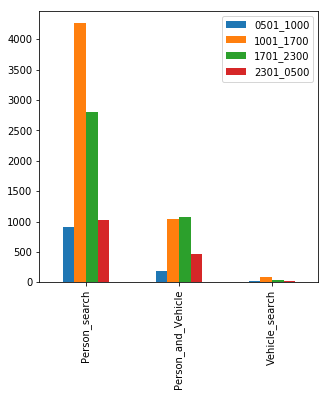

In [15]:
barplot('hour_dummies')

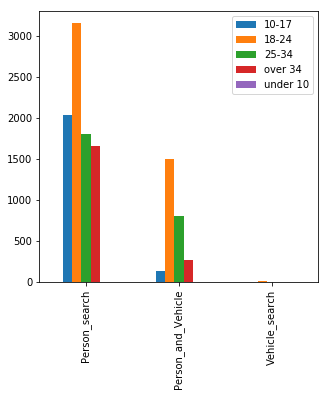

In [16]:
barplot('Age range')

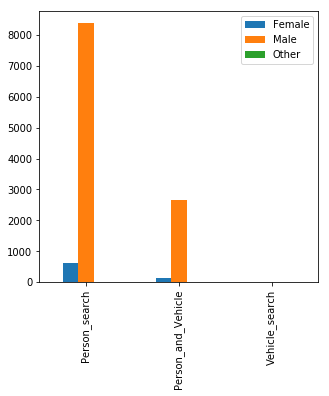

In [17]:
barplot('Gender')

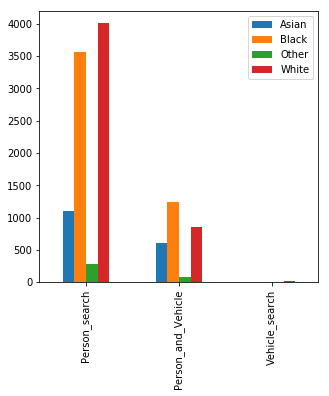

In [18]:
barplot('Officer-defined ethnicity')

## B. Evaluate

In [19]:
crime.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2016-07,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
1,NaN,2016-07,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
2,NaN,2016-07,Metropolitan Police Service,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
3,NaN,2016-07,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
4,NaN,2016-07,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN


In [20]:
ss['Outcome'].value_counts()

Nothing found - no further action          8062
Suspect arrested                           2363
Offender given drugs possession warning    1131
Offender given penalty notice               226
Local resolution                             97
Suspect summonsed to court                   69
Offender cautioned                           14
Name: Outcome, dtype: int64

In [21]:
ss['Outcome linked to object of search'].value_counts()

Series([], Name: Outcome linked to object of search, dtype: int64)

In [22]:
ss.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,month,hour,hour_dummies,Gender_dummies
0,Person search,2016-06-30T23:02:00+00:00,False,NaN,NaN,NaN,Male,18-24,Not Stated (NS),Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,6,23,1701_2300,1.0
1,Person and Vehicle search,2016-06-30T23:05:00+00:00,False,NaN,51.479902,-0.433351,Male,18-24,Black or Black British - Any other Black ethni...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect arrested,NaN,NaN,6,23,1701_2300,1.0
2,Person search,2016-06-30T23:05:00+00:00,False,NaN,51.502729,-0.441156,Female,18-24,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,6,23,1701_2300,0.0
3,Person and Vehicle search,2016-06-30T23:10:00+00:00,False,NaN,51.604407,-0.069872,Male,25-34,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Suspect arrested,NaN,NaN,6,23,1701_2300,1.0
4,Person search,2016-06-30T23:10:00+00:00,False,NaN,51.497555,-0.049637,Male,18-24,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action,NaN,NaN,6,23,1701_2300,1.0


In [23]:
ss.Outcome.value_counts()

Nothing found - no further action          8062
Suspect arrested                           2363
Offender given drugs possession warning    1131
Offender given penalty notice               226
Local resolution                             97
Suspect summonsed to court                   69
Offender cautioned                           14
Name: Outcome, dtype: int64

In [24]:
SSO_list = []
for s in ss['Outcome']:
    if s == 'Nothing found - no further action':
        SSO_list.append('nothing')
    else:
        SSO_list.append('something')
ss['SSO'] = SSO_list

In [25]:
ss['SSO'].value_counts()

nothing      8062
something    3900
Name: SSO, dtype: int64

In [26]:
ss.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,month,hour,hour_dummies,Gender_dummies,SSO
0,Person search,2016-06-30T23:02:00+00:00,False,NaN,NaN,NaN,Male,18-24,Not Stated (NS),Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,6,23,1701_2300,1.0,nothing
1,Person and Vehicle search,2016-06-30T23:05:00+00:00,False,NaN,51.479902,-0.433351,Male,18-24,Black or Black British - Any other Black ethni...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect arrested,NaN,NaN,6,23,1701_2300,1.0,something
2,Person search,2016-06-30T23:05:00+00:00,False,NaN,51.502729,-0.441156,Female,18-24,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,6,23,1701_2300,0.0,nothing
3,Person and Vehicle search,2016-06-30T23:10:00+00:00,False,NaN,51.604407,-0.069872,Male,25-34,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Suspect arrested,NaN,NaN,6,23,1701_2300,1.0,something
4,Person search,2016-06-30T23:10:00+00:00,False,NaN,51.497555,-0.049637,Male,18-24,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action,NaN,NaN,6,23,1701_2300,1.0,nothing


In [29]:
c = pd.merge(how='left', left=a, right=b, on= ['Longitude', 'Latitude'])

In [30]:
b = crime[['Longitude', 'Latitude', 'Location']]

In [31]:
b.dropna(axis= 0, inplace=True)

c:\users\min\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
c = b.groupby(['Longitude','Latitude']).count()

In [33]:
def barplot_SSO(col):
    something = ss[ss['SSO'] == 'something'][col].value_counts()
    nothing = ss[ss['SSO'] == 'nothing'][col].value_counts()
    df = pd.DataFrame([something, nothing])
    df.index = ['somthing', 'nothing']
    df.plot(kind = 'bar', stacked = False, figsize= (5, 5))

In [34]:
ss.columns

Index(['Type', 'Date', 'Part of a policing operation', 'Policing operation',
       'Latitude', 'Longitude', 'Gender', 'Age range',
       'Self-defined ethnicity', 'Officer-defined ethnicity', 'Legislation',
       'Object of search', 'Outcome', 'Outcome linked to object of search',
       'Removal of more than just outer clothing', 'month', 'hour',
       'hour_dummies', 'Gender_dummies', 'SSO'],
      dtype='object')

In [35]:
ss.Legislation.value_counts()

Misuse of Drugs Act 1971 (section 23)                      7635
Police and Criminal Evidence Act 1984 (section 1)          3890
Criminal Justice Act 1988 (section 139B)                    304
Firearms Act 1968 (section 47)                              131
Criminal Justice and Public Order Act 1994 (section 60)       2
Name: Legislation, dtype: int64

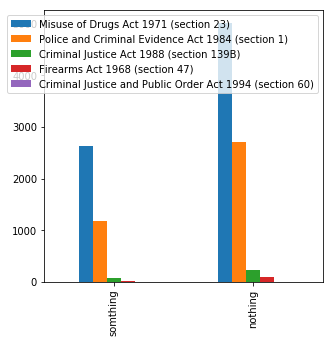

In [36]:
barplot_SSO('Legislation')

In [39]:
location = pd.read_csv('Dataset/postcode.csv')

In [58]:
loc = location[['Latitude', 'Longitude','postcode']]

In [62]:
ss_postcode = pd.merge(how='left', left=ss, right=loc, on= ['Longitude', 'Latitude'])

In [65]:
ss_postcode.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,...,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,month,hour,hour_dummies,Gender_dummies,SSO,postcode
0,Person search,2016-06-30T23:02:00+00:00,False,NaN,NaN,NaN,Male,18-24,Not Stated (NS),Asian,...,Controlled drugs,Nothing found - no further action,NaN,NaN,6,23,1701_2300,1.0,nothing,0
1,Person and Vehicle search,2016-06-30T23:05:00+00:00,False,NaN,51.479902,-0.433351,Male,18-24,Black or Black British - Any other Black ethni...,Black,...,Controlled drugs,Suspect arrested,NaN,NaN,6,23,1701_2300,1.0,something,Hayes
2,Person search,2016-06-30T23:05:00+00:00,False,NaN,51.502729,-0.441156,Female,18-24,White - Any other White ethnic background (W9),White,...,Controlled drugs,Nothing found - no further action,NaN,NaN,6,23,1701_2300,0.0,nothing,Hayes
3,Person and Vehicle search,2016-06-30T23:10:00+00:00,False,NaN,51.604407,-0.069872,Male,25-34,White - Any other White ethnic background (W9),White,...,Articles for use in criminal damage,Suspect arrested,NaN,NaN,6,23,1701_2300,1.0,something,Harringay
4,Person search,2016-06-30T23:10:00+00:00,False,NaN,51.497555,-0.049637,Male,18-24,White - Any other White ethnic background (W9),White,...,Articles for use in criminal damage,Nothing found - no further action,NaN,NaN,6,23,1701_2300,1.0,nothing,Bethnal Green


In [74]:
len(ss_postcode.postcode.value_counts())

119

In [63]:
def barplot_SSO_postcode(col):
    something = ss_postcode[ss_postcode['SSO'] == 'something'][col].value_counts()
    nothing = ss_postcode[ss_postcode['SSO'] == 'nothing'][col].value_counts()
    df = pd.DataFrame([something, nothing])
    df.index = ['somthing', 'nothing']
    df.plot(kind = 'bar', stacked = False, figsize= (5, 5), lengend.l)

In [80]:
ss_count = ss_postcode.groupby(['postcode']).count()

In [90]:
ss_postcode

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,...,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,month,hour,hour_dummies,Gender_dummies,SSO,postcode
0,Person search,2016-06-30T23:02:00+00:00,False,NaN,NaN,NaN,Male,18-24,Not Stated (NS),Asian,...,Controlled drugs,Nothing found - no further action,NaN,NaN,6,23,1701_2300,1.0,nothing,0
1,Person and Vehicle search,2016-06-30T23:05:00+00:00,False,NaN,51.479902,-0.433351,Male,18-24,Black or Black British - Any other Black ethni...,Black,...,Controlled drugs,Suspect arrested,NaN,NaN,6,23,1701_2300,1.0,something,Hayes
2,Person search,2016-06-30T23:05:00+00:00,False,NaN,51.502729,-0.441156,Female,18-24,White - Any other White ethnic background (W9),White,...,Controlled drugs,Nothing found - no further action,NaN,NaN,6,23,1701_2300,0.0,nothing,Hayes
3,Person and Vehicle search,2016-06-30T23:10:00+00:00,False,NaN,51.604407,-0.069872,Male,25-34,White - Any other White ethnic background (W9),White,...,Articles for use in criminal damage,Suspect arrested,NaN,NaN,6,23,1701_2300,1.0,something,Harringay
4,Person search,2016-06-30T23:10:00+00:00,False,NaN,51.497555,-0.049637,Male,18-24,White - Any other White ethnic background (W9),White,...,Articles for use in criminal damage,Nothing found - no further action,NaN,NaN,6,23,1701_2300,1.0,nothing,Bethnal Green
5,Person and Vehicle search,2016-06-30T23:12:00+00:00,False,NaN,51.418969,-0.147822,Female,18-24,Black or Black British - Caribbean (B1),Black,...,Controlled drugs,Offender given drugs possession warning,NaN,NaN,6,23,1701_2300,0.0,something,Mitcham
6,Person search,2016-06-30T23:20:00+00:00,False,NaN,51.388965,0.038793,Male,10-17,White - White British (W1),White,...,Controlled drugs,Nothing found - no further action,NaN,NaN,6,23,1701_2300,1.0,nothing,Bromley
7,Person search,2016-06-30T23:23:00+00:00,False,NaN,51.466820,-0.085747,Male,18-24,Black or Black British - African (B2),Black,...,Articles for use in criminal damage,Suspect arrested,NaN,NaN,6,23,1701_2300,1.0,something,Camberwell
8,Person search,2016-06-30T23:30:00+00:00,False,NaN,51.572151,-0.096839,Male,NaN,Asian or Asian British - Any other Asian ethni...,Asian,...,Articles for use in criminal damage,Nothing found - no further action,NaN,NaN,6,23,1701_2300,1.0,nothing,Harringay
9,Person search,2016-06-30T23:34:00+00:00,False,NaN,51.386089,0.042819,Male,10-17,White - White British (W1),White,...,Articles for use in criminal damage,Suspect arrested,NaN,NaN,6,23,1701_2300,1.0,something,Bromley


In [91]:
ss_postcode.columns

Index(['Type', 'Date', 'Part of a policing operation', 'Policing operation',
       'Latitude', 'Longitude', 'Gender', 'Age range',
       'Self-defined ethnicity', 'Officer-defined ethnicity', 'Legislation',
       'Object of search', 'Outcome', 'Outcome linked to object of search',
       'Removal of more than just outer clothing', 'month', 'hour',
       'hour_dummies', 'Gender_dummies', 'SSO', 'postcode'],
      dtype='object')

In [89]:
ss_count.sort_values(by=['Type'], ascending=False)['Type']

postcode
0                       931
Harringay               603
Brixton Hill            453
Bethnal Green           416
Hammersmith             410
London                  404
Catford                 390
Kensington              381
Walthamstow             345
Camberwell              324
Poplar                  317
Hackney                 308
Brixton                 263
Bayswater               242
East Ham                236
Camden Town             220
Acton                   192
Islington               183
Kennington              182
Thornton Heath          165
Wembley                 154
Battersea               152
Blackheath              149
Chelsea                 145
Kingston upon Thames    141
Ilford                  136
Hounslow                123
Barnsbury               122
Wood Green              116
City of Westminster     114
                       ... 
Ealing Broadway          20
Collier Row              19
Chessington              18
Purley                   17
Teddington 

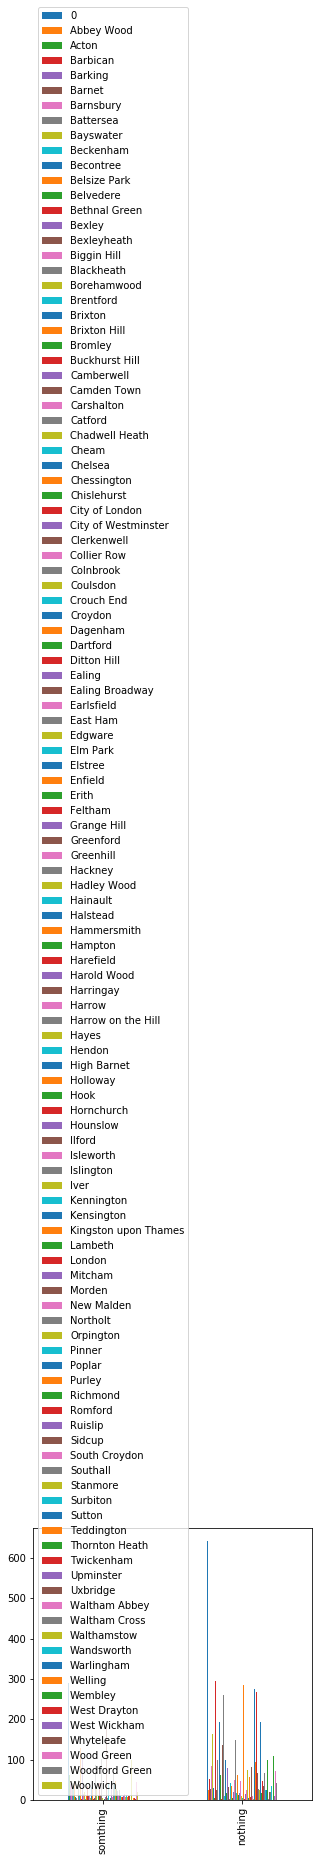

In [68]:
barplot_SSO_postcode('postcode')